In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True, precision=3)

In [7]:
dados = pd.read_csv('data/100samples.csv')
X, y = dados['X'], dados['y']

In [8]:
class AproximadorPolinomial():
    def __init__(self, p):
        self.p = p
        self.w = None

    def fit(self, X_train, y_train):
        H = np.column_stack([X_train**i for i in range(self.p)])
        self.w = np.linalg.pinv(H).dot(y_train)
    
    def predict(self, X_test):
        H = np.column_stack([X_test**i for i in range(self.p)])
        return H.dot(self.w)
    
    def plot(self, axs):
        x = np.linspace(-10, 15, 100)
        ax = axs[(self.p-1)//2, (self.p-1)%2]
        sns.scatterplot(x = X, y = y, label = 'Amostras',  ax = ax, s = 10)
        sns.lineplot(x = x, y = 0.5*x**2+3*x+10, label = '0.5x²+3x+10', ax = ax, color = 'green')
        sns.lineplot(x = x, y = self.predict(x), label = 'Aproximação', ax = ax, color = 'red')
        ax.set_title(f'Aproximação com p = {self.p}')
        ax.get_legend().remove()
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim(-40, 100)
        return ax

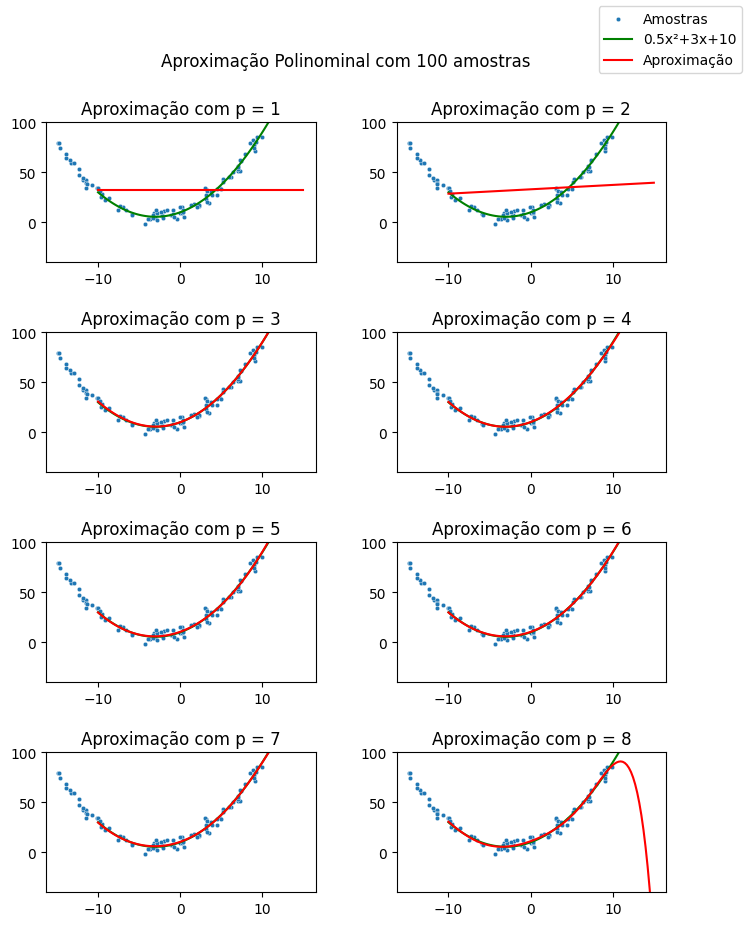

In [9]:
fig, axs = plt.subplots(4,2, figsize = (8, 10))
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)
fig.suptitle(f'Aproximação Polinominal com {dados.shape[0]} amostras', y = 0.95)

for p in range(1, 9):
    Aproximador = AproximadorPolinomial(p)
    Aproximador.fit(X, y)
    ax = Aproximador.plot(axs)

handles, _ = ax.get_legend_handles_labels()
fig.legend(handles=handles, labels=['Amostras', '0.5x²+3x+10', 'Aproximação'], loc='upper right')